In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# DATA AND SETUP 

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\Python DApp_Dec 2023\Data\ds_salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
df.shape

(3755, 11)

In [7]:
df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.drop(['salary_currency','salary'],axis=1,inplace=True)

In [9]:
df.sample(7)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
512,2023,SE,FT,Data Engineer,115000,US,0,US,M
3402,2022,MI,FT,Data Scientist,172386,GB,0,GB,M
106,2023,SE,FT,Data Engineer,94300,US,0,US,M
196,2023,MI,FT,Research Engineer,230000,US,0,US,M
91,2023,SE,FT,Data Scientist,48289,ES,0,ES,M
27,2023,SE,FT,Machine Learning Engineer,200000,US,0,US,M
3670,2021,EN,FT,Data Science Consultant,90000,US,100,US,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


In [11]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


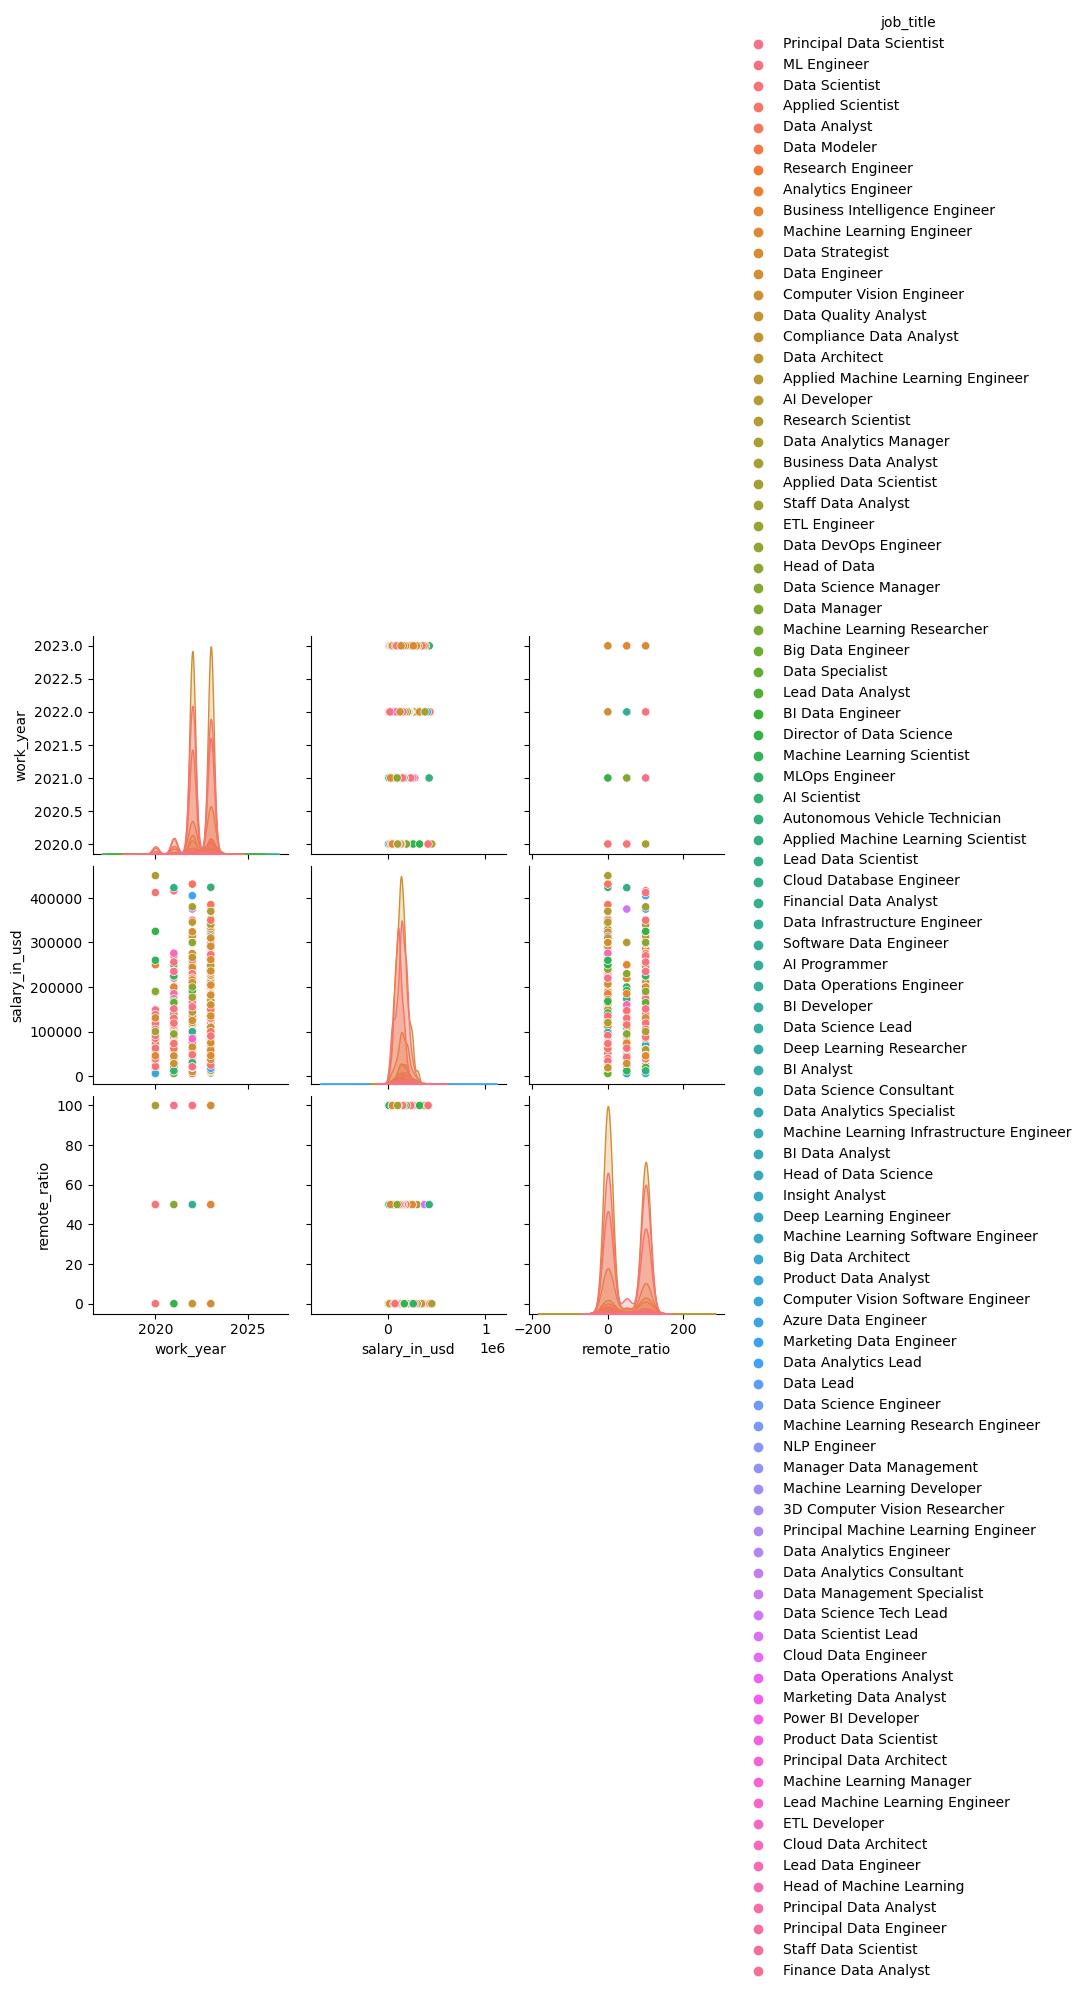

In [12]:
sns.pairplot(df,hue='job_title')

  # Variation in Salaries in top 10 prominent job profiles

In [13]:
df1=df[['job_title','salary_in_usd']]

In [14]:
df1

,job_title,salary_in_usd
0,Principal Data Scientist,85847
1,ML Engineer,30000
2,ML Engineer,25500
3,Data Scientist,175000
4,Data Scientist,120000
...,...,...
3750,Data Scientist,412000
3751,Principal Data Scientist,151000
3752,Data Scientist,105000
3753,Business Data Analyst,100000


In [15]:
df2 = df1.groupby('job_title').mean()
df2

,salary_in_usd
job_title,
3D Computer Vision Researcher,21352.250000
AI Developer,136666.090909
AI Programmer,55000.000000
AI Scientist,110120.875000
Analytics Engineer,152368.631068
...,...
Research Engineer,163108.378378
Research Scientist,161214.195122
Software Data Engineer,62510.000000


In [16]:
df3 = df2.sort_values(by='salary_in_usd',ascending=False).head(10)
df3


,salary_in_usd
job_title,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000
Machine Learning Software Engineer,192420.000000
Data Science Manager,191278.775862


In [17]:
df3.columns

Index(['salary_in_usd'], dtype='object')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Data Science Tech Lead to Applied Scientist
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salary_in_usd  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


Text(0.5, 1.0, 'PROMINENT JOBS AND THEIR RESPECTIVE SALARIES')

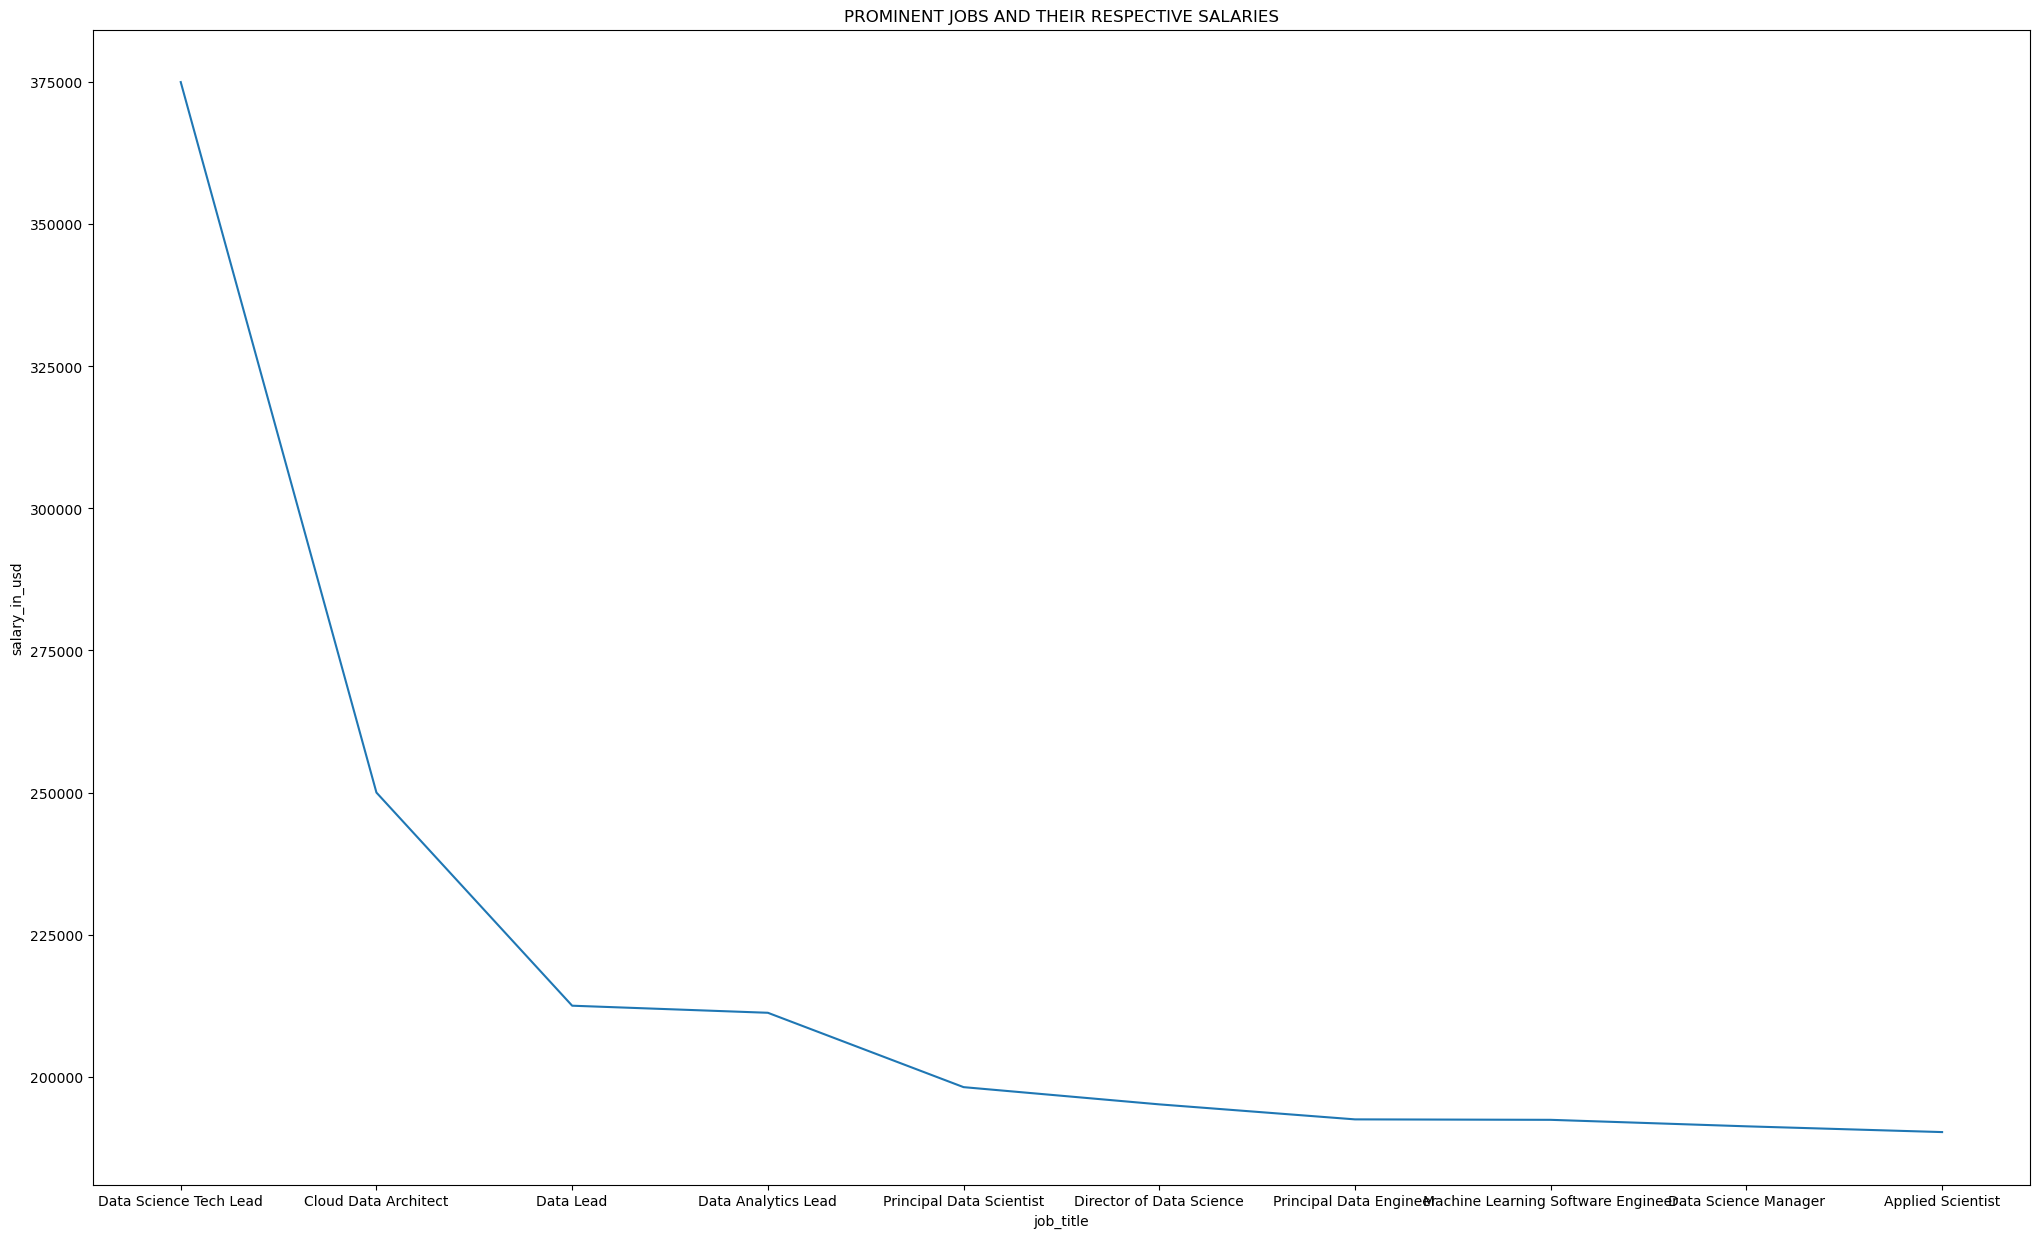

In [19]:
plt.figure(figsize=(25,15))
sns.lineplot(data=df3,x='job_title',y='salary_in_usd')
plt.title("PROMINENT JOBS AND THEIR RESPECTIVE SALARIES")

### Here we can see that Head of Machine Learning	gets the top salary followed by Principal Data Architec,Lead Machine Learning Engineer,Lead Machine Learning Engineer and so on

### experience_level: The experience level in the job during the year.

#### EN > Entry-level / Junior
#### MI> Mid-level / Intermediate
#### SE > Senior-level / Expert
#### EX > Executive-level / Director

In [20]:
expr = df[['experience_level','salary_in_usd']]
expr1=expr.groupby('experience_level').mean()
expr1.reset_index(inplace = True)
expr1.columns
expr1

,experience_level,salary_in_usd
0,EN,78546.284375
1,EX,194930.929825
2,MI,104525.939130
3,SE,153051.071542


In [21]:
##expr2 = pd.pivot_table(expr,values = ['salary_in_usd'], aggfunc='mean',columns=['experience_level'])


In [22]:
expr1.columns

Index(['experience_level', 'salary_in_usd'], dtype='object')

Text(0.5, 1.0, 'EXPERIENCE LEVEL VS SALARY IN USD')

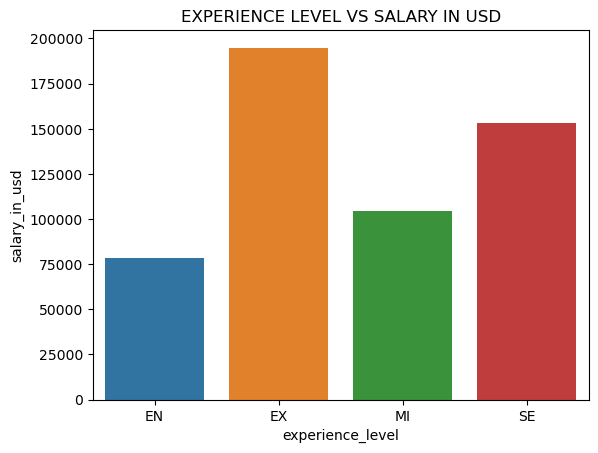

In [23]:
plt.figure()

sns.barplot(data= expr1,x='experience_level',y= 'salary_in_usd')
plt.title("EXPERIENCE LEVEL VS SALARY IN USD") 



### From the above plot we can see that Executive-level / Director receives the higest salary and Entry-level / Junior  receives the least salary among all the other types of experience level.

In [24]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [25]:
yr = df[['salary_in_usd','work_year','employment_type']]
yr1 =yr.groupby(['work_year','employment_type']).mean()
yr1.reset_index(inplace = True)
yr1.columns
yr1

,work_year,employment_type,salary_in_usd
0,2020,CT,100000.000000
1,2020,FL,60000.000000
2,2020,FT,94685.625000
3,2020,PT,18817.500000
4,2021,CT,263666.666667
5,2021,FL,25851.666667
6,2021,FT,94996.852535
7,2021,PT,22455.142857
8,2022,CT,46992.250000
9,2022,FL,70130.750000


### employment_type: The type of employment for the role.

PT - Part-time
FT - Full-time
CT - Contract
FL - Freelanc


Text(0.5, 1.0, 'Variation of Salaries with the Employment Type across Diffrent years')

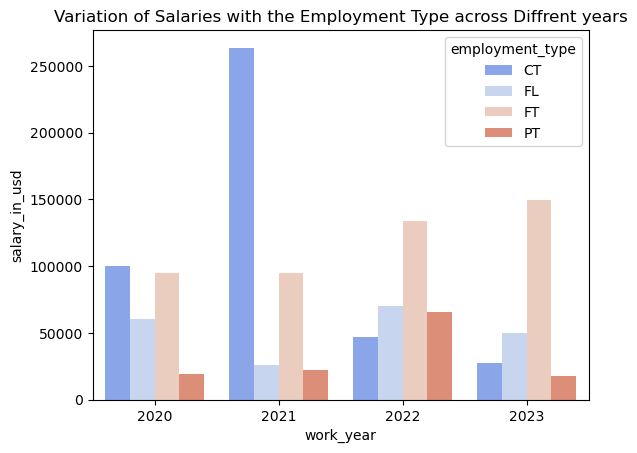

In [26]:
sns.barplot(data=yr1,x='work_year',y='salary_in_usd',hue=yr1['employment_type'],palette= "coolwarm",estimator='median')
plt.title("Variation of Salaries with the Employment Type across Diffrent years")

### Here the plot describes how the salary(in USD) varies with the Work Years for different types of employment.

In [27]:
yr2 = df[['salary_in_usd','work_year','experience_level']]
yr2 =yr2.groupby(['work_year','experience_level']).mean()
yr2.reset_index(inplace = True)
yr2.columns
yr2

,work_year,experience_level,salary_in_usd
0,2020,EN,57511.608696
1,2020,EX,139944.333333
2,2020,MI,87564.718750
3,2020,SE,137240.500000
4,2021,EN,54905.254545
5,2021,EX,186128.000000
6,2021,MI,82116.934783
7,2021,SE,126085.356164
8,2022,EN,77006.024194
9,2022,EX,188260.292683


Text(0.5, 1.0, 'Variation of Salaries with Experience Level across Diffrent years')

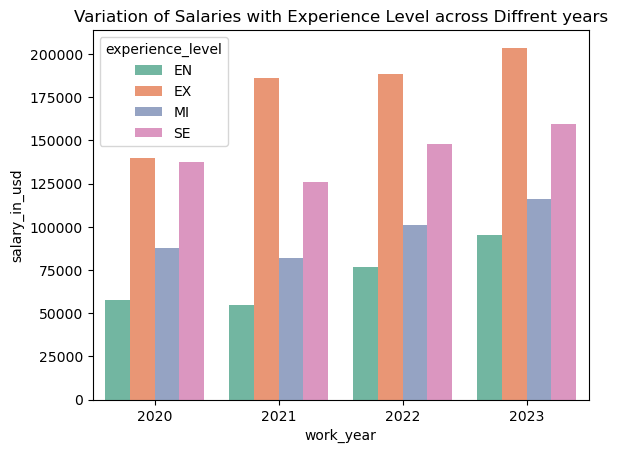

In [28]:
sns.barplot(data=yr2,x='work_year',y='salary_in_usd',hue=yr2['experience_level'],palette="Set2",saturation=0.75)
plt.title("Variation of Salaries with Experience Level across Diffrent years")

### Here the plot describes how the salary(in USD) varies with the work year for different experience level.

In [29]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [137]:
df['employee_residence'].value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

In [30]:
es = df[['employee_residence','job_title','salary_in_usd']]
es

,employee_residence,job_title,salary_in_usd
0,ES,Principal Data Scientist,85847
1,US,ML Engineer,30000
2,US,ML Engineer,25500
3,CA,Data Scientist,175000
4,CA,Data Scientist,120000
...,...,...,...
3750,US,Data Scientist,412000
3751,US,Principal Data Scientist,151000
3752,US,Data Scientist,105000
3753,US,Business Data Analyst,100000


In [31]:
es =es.groupby(['employee_residence','job_title']).mean()

In [32]:
es =es.sort_values(by=['salary_in_usd'],ascending=False).head(10)
es.reset_index(inplace=True)
es

,employee_residence,job_title,salary_in_usd
0,IL,AI Scientist,423834.0
1,US,Data Analytics Lead,405000.0
2,US,Data Science Tech Lead,375000.0
3,IN,AI Developer,300000.0
4,US,Director of Data Science,294375.0
5,US,Lead Data Engineer,276000.0
6,CA,AI Developer,275000.0
7,JP,Machine Learning Scientist,260000.0
8,US,Principal Data Scientist,255500.0
9,US,Cloud Data Architect,250000.0


Text(0.5, 1.0, ' AVERAGE SALARIES OF DIFFERENT JOB TITLES  ALONG WITH THE EMPLOYEE_RESIDENCE')

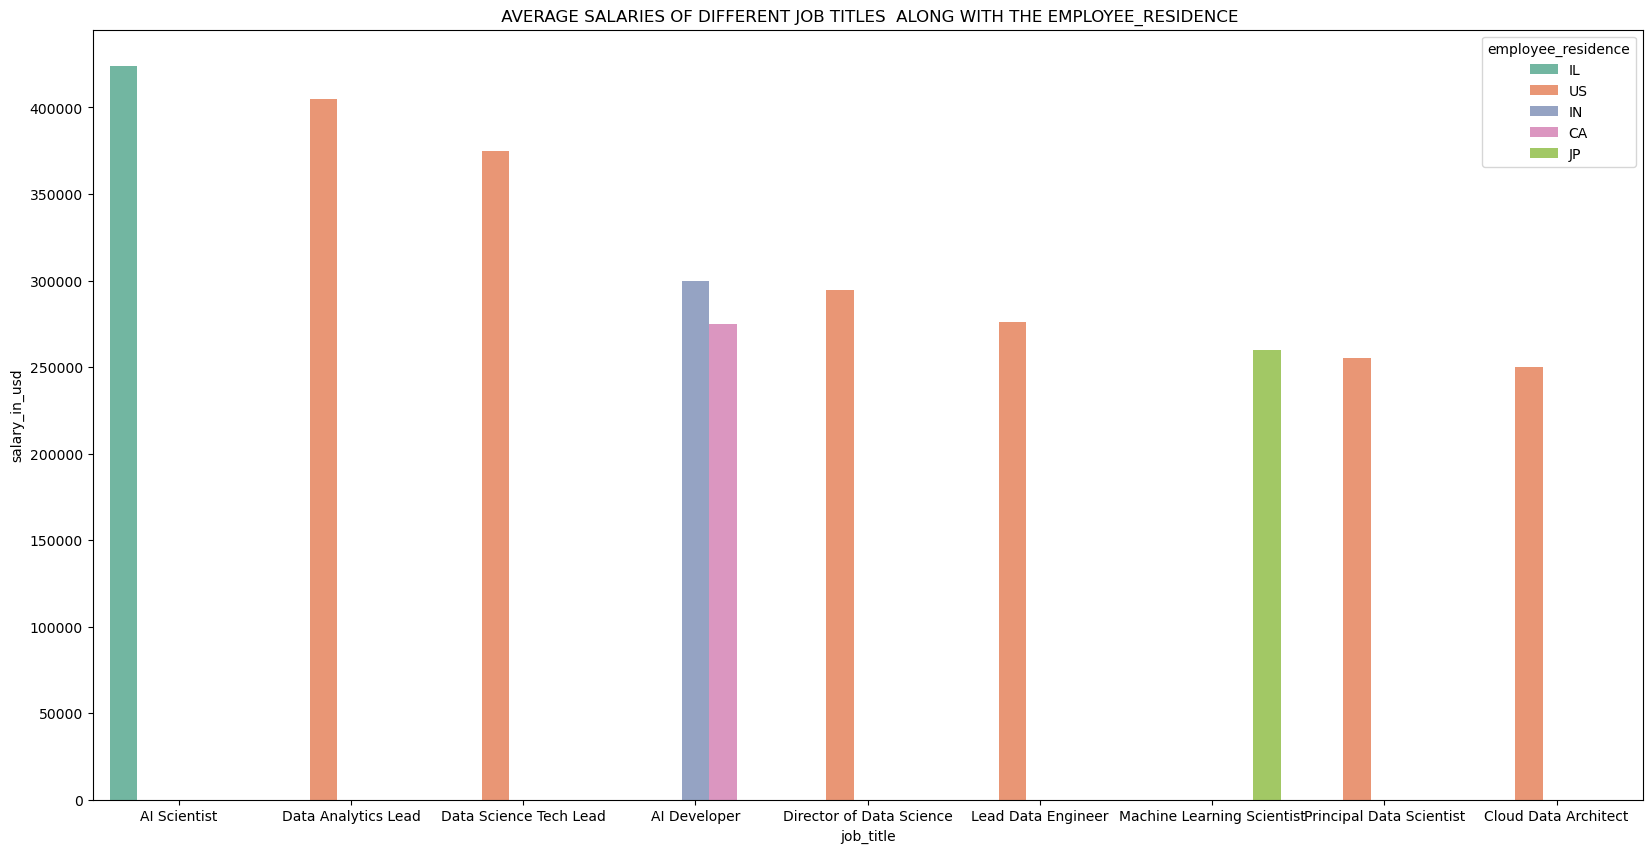

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(data=es,x='job_title',y='salary_in_usd',hue='employee_residence',palette="Set2")
plt.title(" AVERAGE SALARIES OF DIFFERENT JOB TITLES  ALONG WITH THE EMPLOYEE_RESIDENCE")

### Here from the above bar diagram we can see that most of the prominent jobs are from USA.And further if we notice it carefully we will see that AI Scientist from Ireland earns the most average salaries,Data Analytics Lead comes then and so on.

In [34]:
es.columns

Index(['employee_residence', 'job_title', 'salary_in_usd'], dtype='object')

# Extracting the top most high paid job in US

In [35]:
es1 = es[es['employee_residence']=='US']

Text(0.5, 1.0, 'DIFFERENT JOBS AND THEIR SALARIES IN USA')

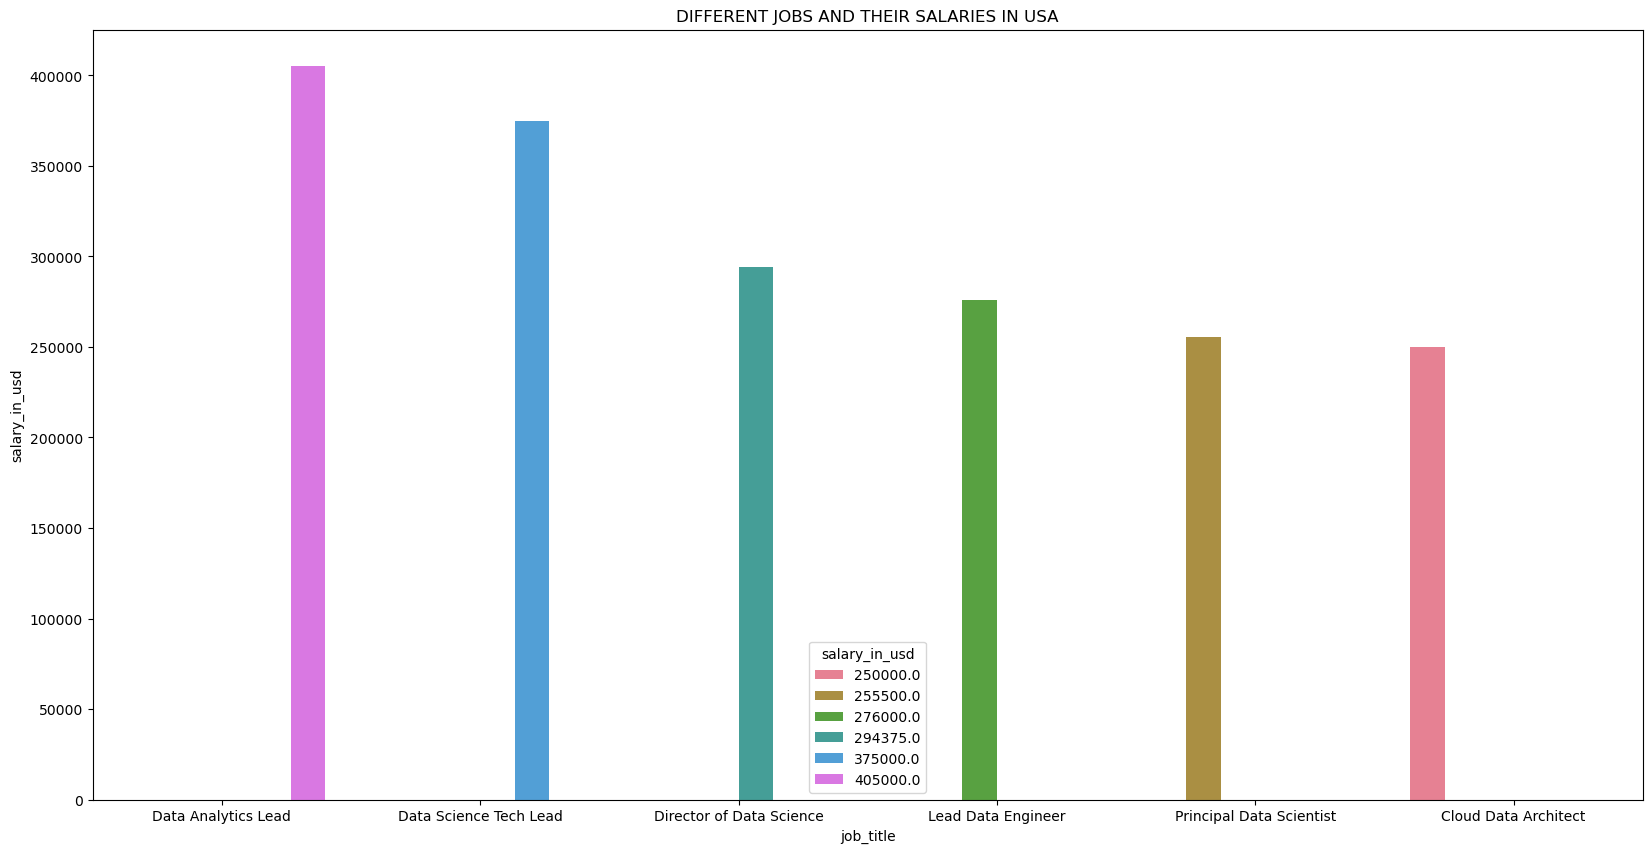

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(data=es1,x='job_title',y='salary_in_usd',hue='salary_in_usd',palette='husl')
plt.title("DIFFERENT JOBS AND THEIR SALARIES IN USA")

### From the above bar diagram we can conclude that the Research scientist earns the most salaries among all the jobs in USA and Data Architect earns the less among all.

### Remote_Ratio:The overall amount of work done remotely.100% Remote Work: These positions are fully remote and allow you to work from home for all of your working hours, with no in-office time or travel required.

In [37]:
#filtering the data such that employee residence is US and remote ratio is 100.
us = df[df['employee_residence']=='US']
remote = df[df['remote_ratio']==100]

In [38]:
remote


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S


In [39]:
remote1 = remote[['job_title','salary_in_usd']]
remote1

,job_title,salary_in_usd
0,Principal Data Scientist,85847
1,ML Engineer,30000
2,ML Engineer,25500
3,Data Scientist,175000
4,Data Scientist,120000
...,...,...
3749,Data Specialist,165000
3750,Data Scientist,412000
3751,Principal Data Scientist,151000
3752,Data Scientist,105000


### Top 10 high paid jobs that are done remotely in US

In [40]:
rem = remote1.sort_values(by=['salary_in_usd'],ascending=False).head(11)
rem = rem.groupby('job_title').mean()
#rem.reset_index(inplace=True) 
rem

,salary_in_usd
job_title,
Applied Data Scientist,380000.0
Data Analytics Lead,405000.0
Data Architect,376080.0
Data Engineer,324000.0
Data Scientist,381000.0
Director of Data Science,325000.0
Machine Learning Engineer,318300.0
Machine Learning Software Engineer,375000.0
Principal Data Scientist,416000.0


In [41]:
rem

,salary_in_usd
job_title,
Applied Data Scientist,380000.0
Data Analytics Lead,405000.0
Data Architect,376080.0
Data Engineer,324000.0
Data Scientist,381000.0
Director of Data Science,325000.0
Machine Learning Engineer,318300.0
Machine Learning Software Engineer,375000.0
Principal Data Scientist,416000.0


Text(0.5, 1.0, 'TOP 10 DREAM JOBS THAT ARE 100% WORK FROM HOME ')

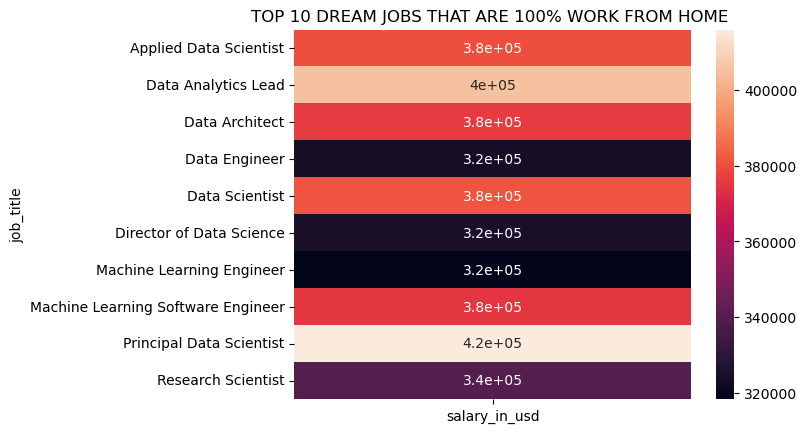

In [42]:
sns.heatmap(data=rem,annot=True)
plt.title("TOP 10 DREAM JOBS THAT ARE 100% WORK FROM HOME ")

### How the salary structure varies with the company size

In [43]:
size = df[['company_size','salary_in_usd','job_title']]

In [44]:
size

,company_size,salary_in_usd,job_title
0,L,85847,Principal Data Scientist
1,S,30000,ML Engineer
2,S,25500,ML Engineer
3,M,175000,Data Scientist
4,M,120000,Data Scientist
...,...,...,...
3750,L,412000,Data Scientist
3751,L,151000,Principal Data Scientist
3752,S,105000,Data Scientist
3753,L,100000,Business Data Analyst


In [45]:
size1=size.groupby(['company_size','job_title']).mean()
size1.reset_index(inplace=True)
size1

,company_size,job_title,salary_in_usd
0,L,AI Developer,257309.000000
1,L,AI Programmer,70000.000000
2,L,AI Scientist,173744.166667
3,L,Analytics Engineer,130000.000000
4,L,Applied Data Scientist,149824.166667
...,...,...,...
174,S,Principal Data Analyst,75000.000000
175,S,Principal Data Scientist,416000.000000
176,S,Product Data Analyst,20000.000000
177,S,Research Engineer,96578.000000


In [46]:
size2 = size1.sort_values(by=['salary_in_usd'],ascending=False).head(10)
size2

,company_size,job_title,salary_in_usd
175,S,Principal Data Scientist,416000.000000
22,L,Data Analytics Lead,405000.000000
32,L,Data Science Tech Lead,375000.000000
44,L,Lead Data Engineer,276000.000000
0,L,AI Developer,257309.000000
14,L,Cloud Data Architect,250000.000000
114,M,Head of Data,232820.000000
110,M,Director of Data Science,214553.000000
128,M,Machine Learning Software Engineer,212688.888889
96,M,Data Lead,212500.000000


In [47]:
#size2.nlargest(10,'salary_in_usd')[['company_size','job_title','salary_in_usd']] ;Same as the above

<Axes: xlabel='salary_in_usd', ylabel='job_title'>

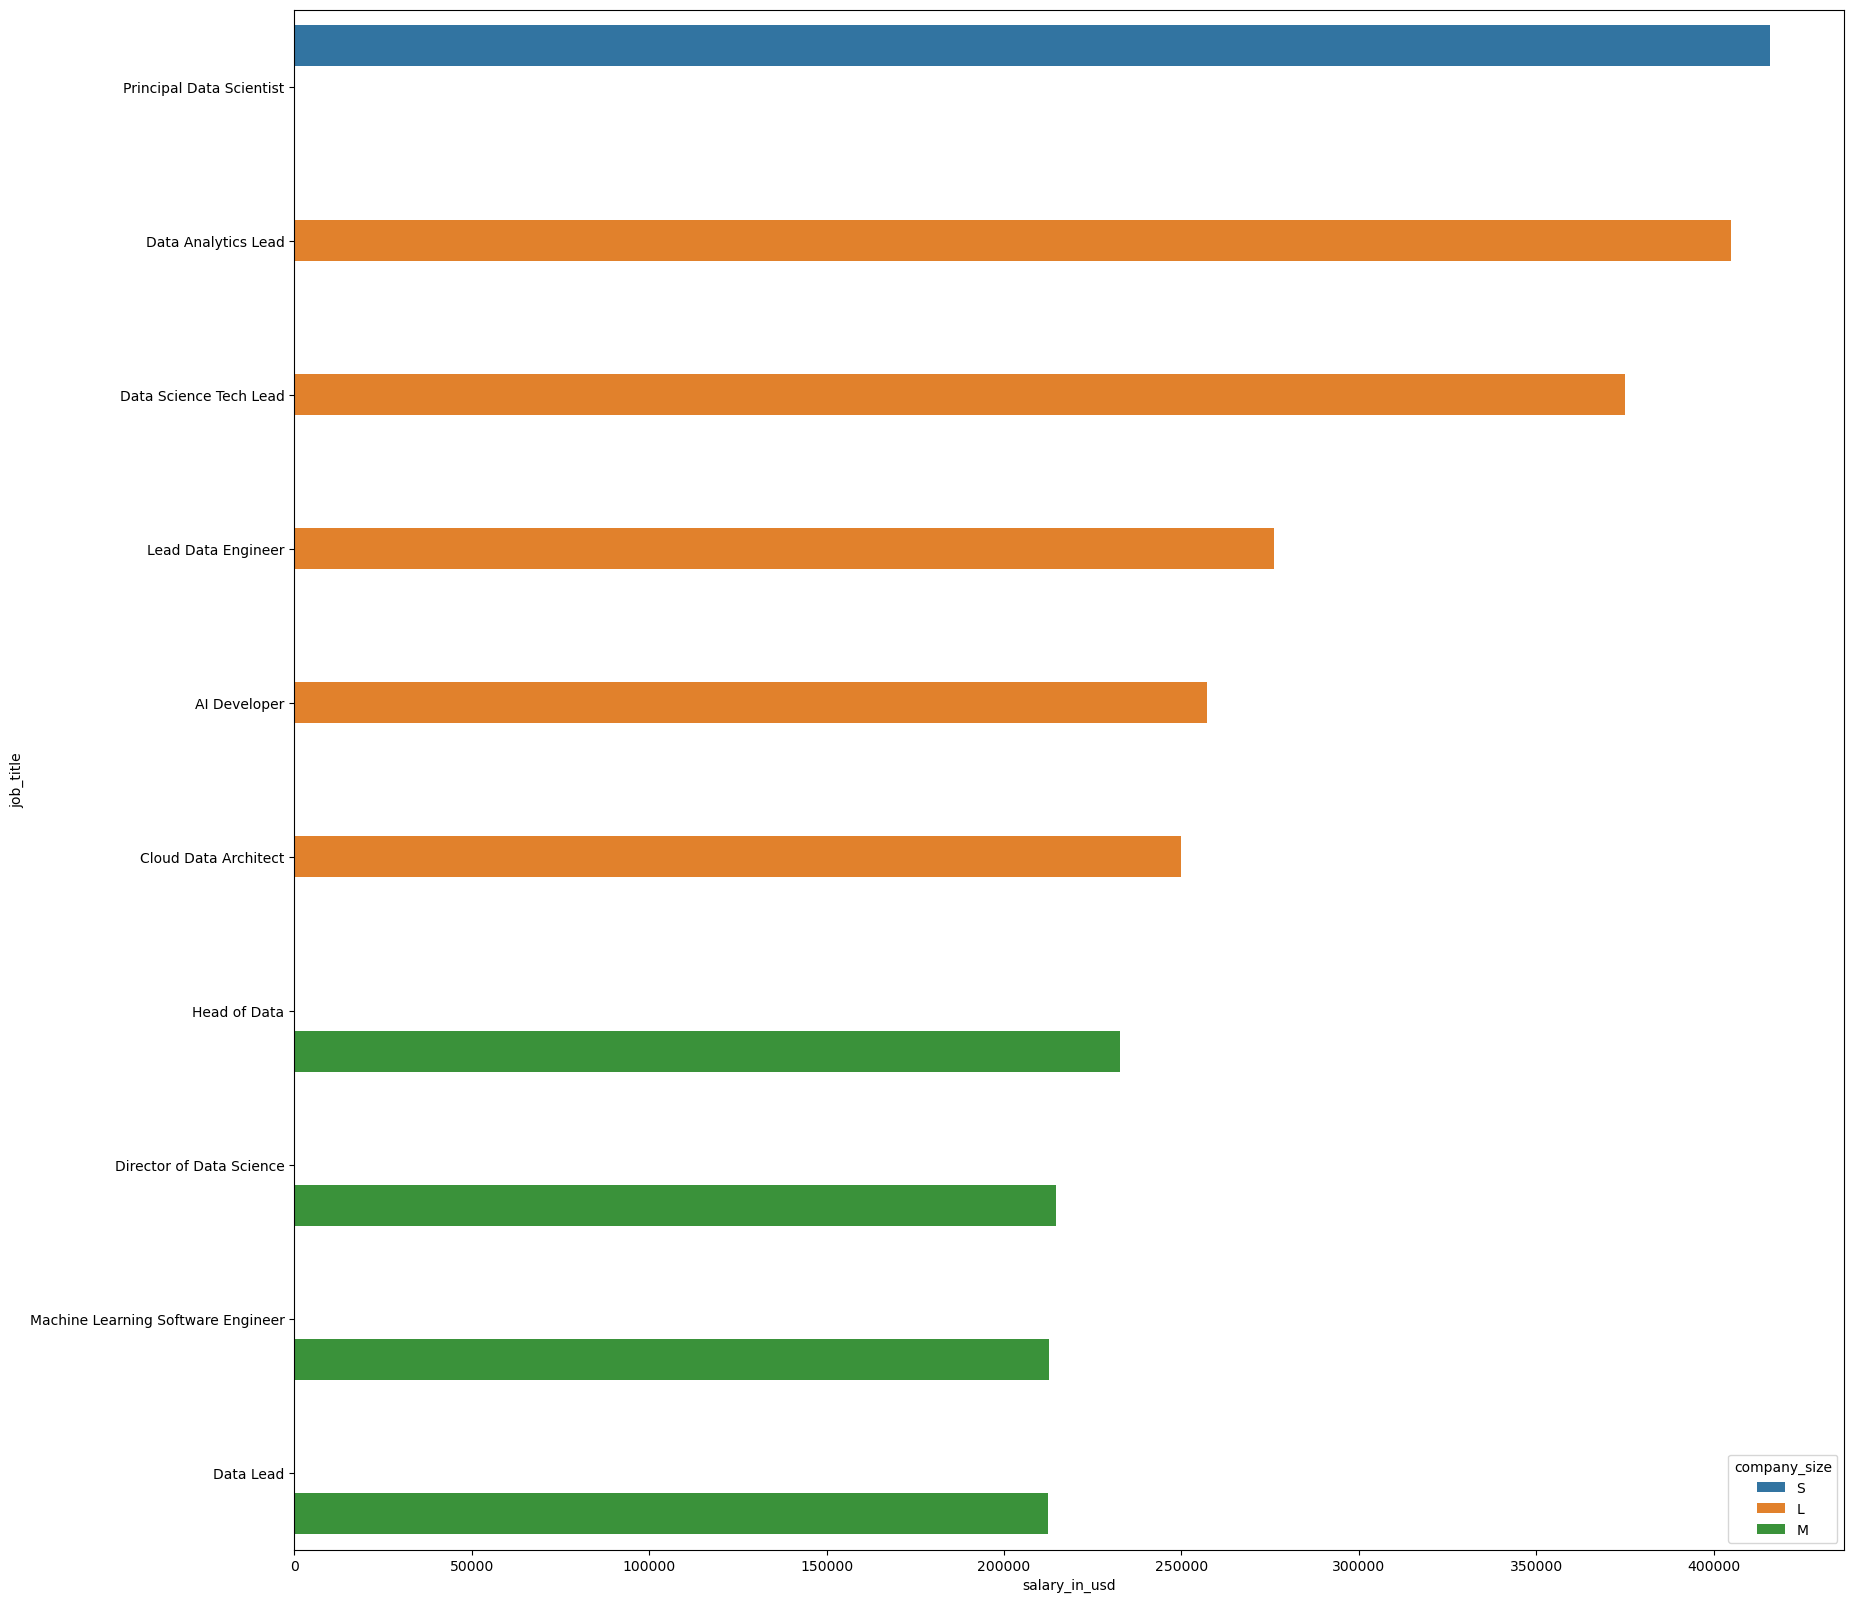

In [48]:
plt.figure(figsize=(20,20))
sns.barplot(data=size2,y='job_title',x='salary_in_usd',hue='company_size')

### From the above horizontal bar diagram we can conclude that  Avg salary of a  Principal Data Scientist is highest and they belongs to a Small company.The reason may be that for a startup company a Principal Data scientist may handle all of the works and they may not have much vacancies for other employees.

In [49]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


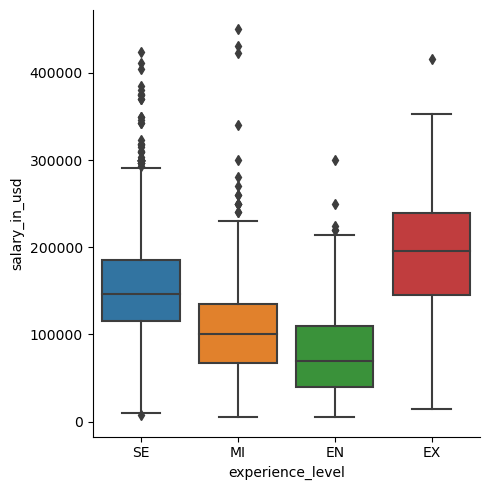

In [50]:
sns.catplot(data=df,kind='box',x='experience_level',y='salary_in_usd')